##  SPEAKER DIARIZATION

#### Speaker Diarization is the process of identifying and distinguishing the different speakers in a speech/audio file.

In this notebook, we can perform Speech diarization using a demo file and any custom audio file. (In case of custom audio file, please provide the path of the custom audio file to be processed). We have 2 sections repectively for processing small and large files.

#### Section 1: Speaker Diarization in small custom file

In this section, we can perform Speaker diarization in any custom audio file of '.wav' format.

In [1]:
# Specify the name of the wav file with path to analyze. For the purpose of representation, a sample Demofile name is provided here.
demo_small_file = 'audio.wav'

In [2]:
#create a data dictionary of the audio file for processing
DEMO_SMALL_FILE = {'audio': demo_small_file}

Kindly process the next cell to trim a portion of the file for processing and visualization purposes 

In [3]:
#import modules for processing wav file and view it inside jupyter
from pyannote.audio.features import RawAudio
from IPython.display import Audio

In [4]:
waveform = RawAudio(sample_rate=16000)(DEMO_SMALL_FILE).data
Audio(data=waveform.squeeze(), rate=16000, autoplay=True)

###### Speaker Diarization Prediction for small file

In [5]:
#Import the diaization pipeline from Torch-hub and execute the pipeline
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')

Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-audio_master
Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-audio_master
Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-audio_master
Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-audio_master
C:\Users\LakshmipathyGanesh\AppData\Roaming\Python\Python37\site-packages\pyannote\audio\embedding\approaches\arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
C:\Users\LakshmipathyGanesh\AppData\Roaming\Python\Python37\site-packages\pyannote\audio\features\pretrained.py:156: UserWarning: Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.
  warnings.warn(msg)
Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-

In [6]:
diarization = pipeline(DEMO_SMALL_FILE)

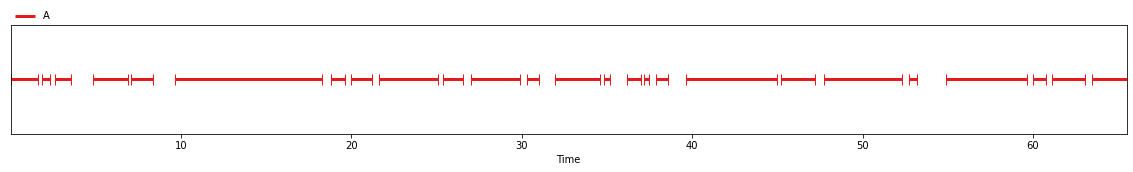

In [7]:
diarization

#### Section 2: Speaker diarization in sample large file

For the purpose of validating the concept through a large demo file, we will use a sample audio file coming from the AMI corpus, which contains a conversation between 4 people in a meeting room that is already available in this repository. The processing of  large file is computationally intensive and might take longer time

In [8]:
#Create data dictionary of the file for processing 
DEMO_LARGE_FILE = {'uri': 'ES2004a.Mix-Headset', 'audio': 'ES-Mix-headset.wav'}

Note: In case of processing large file, we trim a smaller portion of the file during the runtime to ease with the processing in the next cell. If the processing is to be performed on the whole file, the next cell can be skipped

In [9]:
# import support modules for trimming audio file, notebook support
from pyannote.core import Segment, notebook

# make notebook visualization zoom on 600s < t < 660s time range (trim the audio file to 1minute duration from 600s to 660s)
EXCERPT = Segment(600, 660)
notebook.crop = EXCERPT

In [10]:
#Import packages for audio processing and display
from pyannote.audio.features import RawAudio
from IPython.display import Audio

In [11]:
# load audio waveform, crop excerpt, and play it
#### If the whole file needs to be squeezed into jupyter in memory, replace the below line with waveform = RawAudio(sample_rate=16000)(DEMO_LARGE_FILE).data
waveform = RawAudio(sample_rate=16000).crop(DEMO_LARGE_FILE, EXCERPT) 
Audio(data=waveform.squeeze(), rate=16000, autoplay=True)

###### Speaker Diarization Prediction for sample large file

In [12]:
#Import the diaization pipeline from Torch-hub and execute the pipeline
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')

Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-audio_master
Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-audio_master
Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-audio_master
Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-audio_master
C:\Users\LakshmipathyGanesh\AppData\Roaming\Python\Python37\site-packages\pyannote\audio\embedding\approaches\arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
C:\Users\LakshmipathyGanesh\AppData\Roaming\Python\Python37\site-packages\pyannote\audio\features\pretrained.py:156: UserWarning: Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.
  warnings.warn(msg)
Using cache found in C:\Users\LakshmipathyGanesh/.cache\torch\hub\pyannote_pyannote-

In [14]:
diarization = pipeline(DEMO_LARGE_FILE)

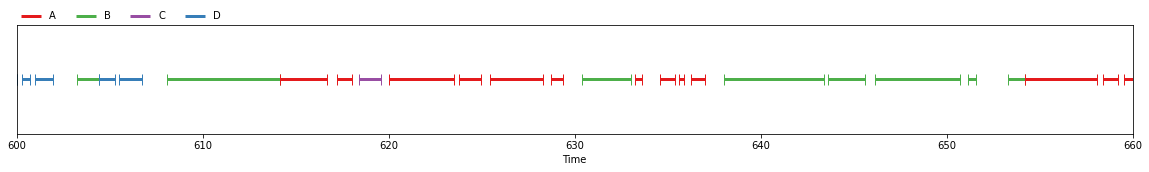

In [15]:
#Visualize the predicted diarization
diarization